In [1]:
import os
from fredapi import Fred
from dotenv import load_dotenv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()
FRED_API_KEY = os.getenv("FRED_API_KEY")
fred = Fred(api_key=FRED_API_KEY)

In [2]:
series = 'T10Y2Y'
data = fred.get_series(series)

df = (
    pd.DataFrame(data, columns=[series])
    .reset_index()
    .rename(columns={'index': 'date'})
)

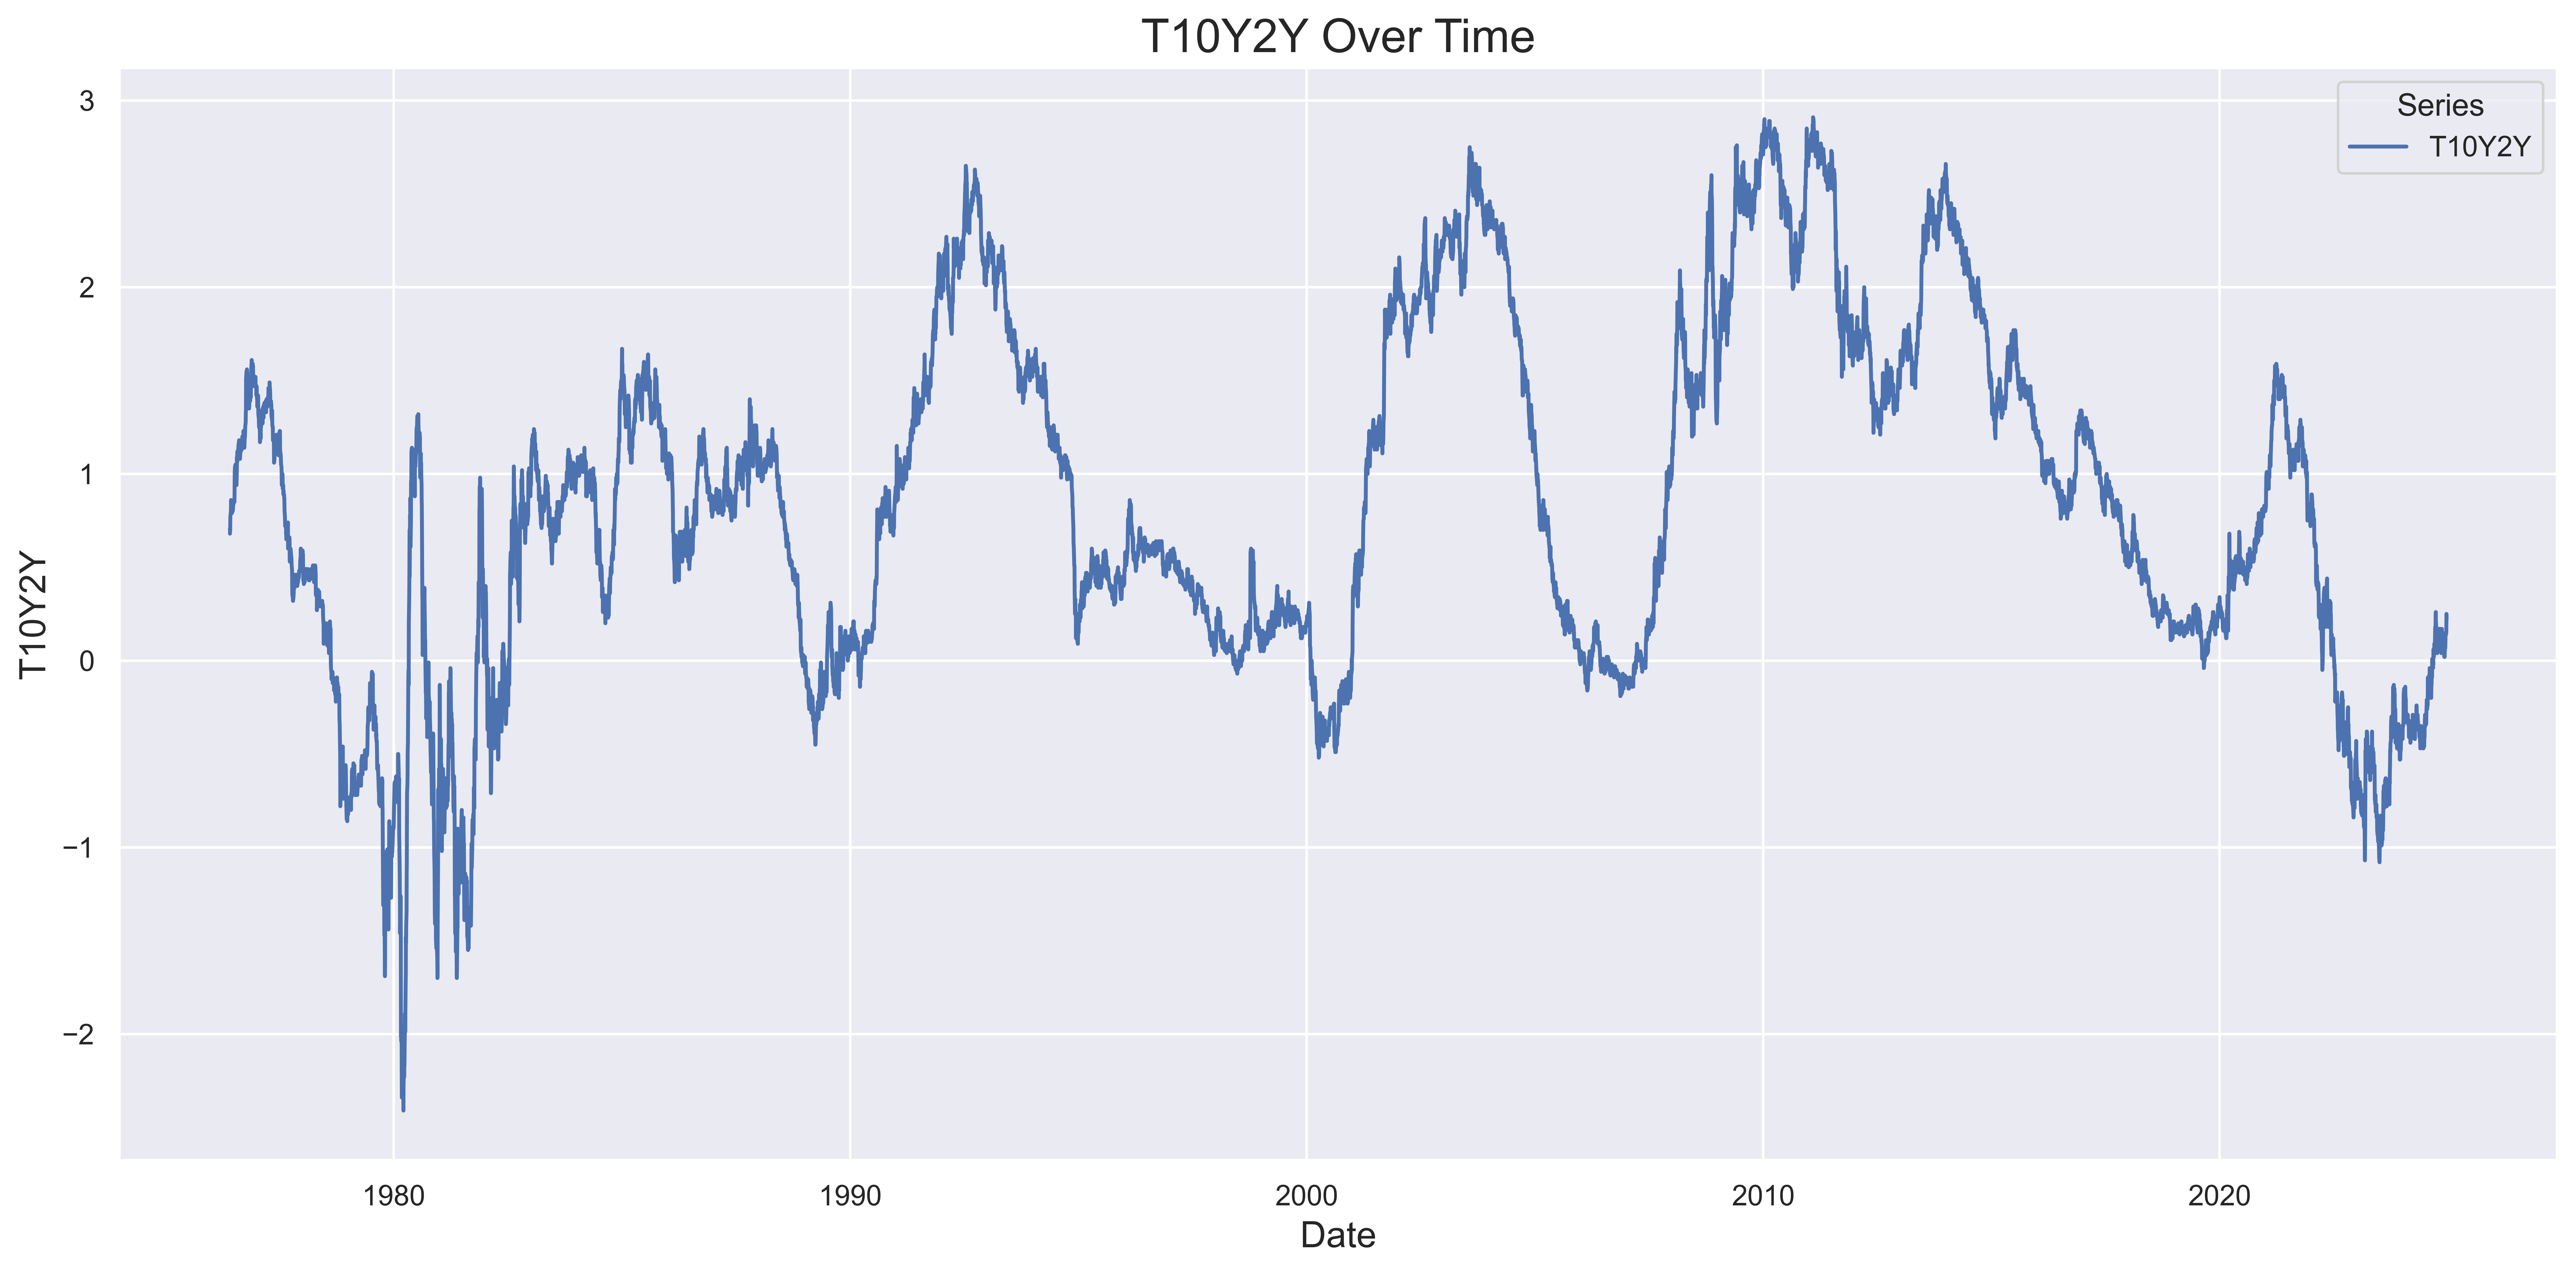

In [ ]:
plt.figure(figsize=(14, 7), dpi=300)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x='date', y=series, label=series)

plt.title(f'{series} Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel(series, fontsize=14)
plt.legend(title='Series')
plt.tight_layout()

# Display the plot
plt.show()